In [ ]:
import functions
import pandas as pd
from sklearn import *;
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek


## Preparing training data
 Observations:
 - Highly biased dataset.
 - In this scenario we will be randomly undersampling the majority class.

In [ ]:
# READ AND CREATE A SINGLE TRAINING DATASET
mockito = functions.process_project_data('mockito',exploratory=True)
wildfly = functions.process_project_data('wildfly',exploratory=True)
ant = functions.process_project_data('ant',exploratory=True)


mockito = functions.limit_data_dict(mockito)
wildfly = functions.limit_data_dict(wildfly)
ant = functions.limit_data_dict(ant)

columns = mockito[list(mockito.keys())[0]].columns
traindf = pd.DataFrame(columns=columns)

for ver in mockito:
    traindf = traindf.append(mockito[ver],sort=True)
for ver in wildfly:
    traindf = traindf.append(wildfly[ver],sort=True)
for ver in ant:
    traindf = traindf.append(ant[ver],sort=True)
    
traindf.drop('code_smell',axis=1,inplace=True)

In [ ]:
# CHECK THE BALANCE OF DATASET
traindf.groupby('bug')['bug'].count().plot(kind = 'bar')
traindf.groupby('bug')['bug'].count()

In [ ]:
def get_sampled_data(traindf,sampleSize=15000):
    data1 = traindf[traindf.bug==1]
    data0 = traindf[traindf.bug==0]
    data0 = data0.sample(sampleSize)
    traindf = data0
    traindf = traindf.append(data1)
    return traindf

In [5]:
traindf = get_sampled_data(traindf,30000)

# SEPARATE INTO TRAINING AND TESTING SET


In [6]:

y = traindf.pop('bug')
X = traindf

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)


/home/harsh/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/home/harsh/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/home/harsh/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/home/harsh/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))


In [7]:
# CHECKING THE BALANCE AFTER SAMPLING
df = pd.DataFrame(y)
df.columns=['0']
df.groupby('0')['0'].count()

0
0    30000
1    14853
Name: 0, dtype: int64

In [8]:
X = pd.DataFrame(X,columns=columns[:-2])
X['bug'] = 0
X['bug'] = y

---

In [9]:
X.bug.unique()

array([0, 1], dtype=object)

In [10]:
X.columns

Index(['cbo', 'noc', 'cyclomatic', 'dit', 'lcom', 'rfc', 'wmc', 'bug'], dtype='object')

In [11]:
for col in X:
    X[col] = X[col].astype(int)
    

In [13]:
X.to_csv('data/trainset.csv')

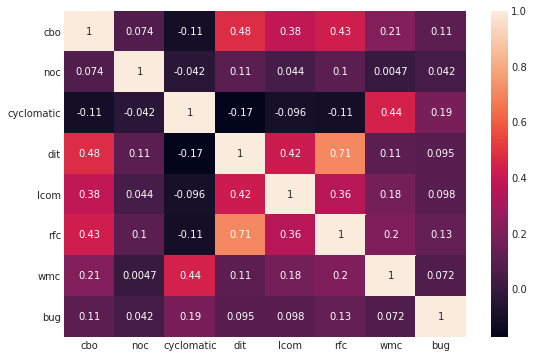

In [12]:

plt.figure(figsize=(9,6))
corr = X.corr(method='pearson')
sns.heatmap(corr,annot=True)
plt.show()

ant = functions.process_project_data('ant',exploratory=True)
columns = ant[list(ant.keys())[0]].columns
testdf = pd.DataFrame(columns=columns)

for ver in ant:
    testdf = testdf.append(ant[ver],sort=True)
for ver in wildfly:
    testdf = testdf.append(wildfly[ver],sort=True)
    
testdf.drop('code_smell',axis=1,inplace=True)

In [ ]:
for col in traindf:
    traindf[col] = traindf[col].astype(int)
    

In [ ]:
traindf.describe()

In [ ]:
traindf.to_csv('data/trainset.csv')